In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Visadataset.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
for i in data.columns:
    print(f"{i} unique : {data[i].unique()}/n")

case_id unique : ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']/n
continent unique : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']/n
education_of_employee unique : ['High School' "Master's" "Bachelor's" 'Doctorate']/n
has_job_experience unique : ['N' 'Y']/n
requires_job_training unique : ['N' 'Y']/n
no_of_employees unique : [14513  2412 44444 ... 24335 48785 40224]/n
yr_of_estab unique : [2007 2002 2008 1897 2005 2012 1994 1924 1995 2004 1963 2006 1987 1991
 2001 1972 2013 1968 1884 1981 1997 2009 1998 1880 2000 2010 1965 1909
 2011 1989 1933 1960 2003 1976 1996 1847 1935 1890 1999 1838 1947 1939
 1970 1977 1982 1943 1956 1864 1974 1985 1984 1971 1913 1969 1818 1839
 1914 1988 1944 1855 1975 1966 1801 1920 1925 1993 1992 1979 1986 1931
 1962 1954 1868 1859 1946 1950 1869 1917 2014 1980 1896 1949 1843 1850
 1906 1961 1951 1958 1912 1983 1948 1945 1978 1898 1923 1911 1851 1865
 1849 1872 1967 1926 1873 1848 2015 1889 1876 1852 1938 1973 1959 1

## EDA

In [3]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [5]:
data.duplicated().any()

False

In [6]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
num_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [7]:
cat_features= [feature for feature in data.columns if data[feature].dtype == 'O']
print(len(cat_features))
cat_features

9


['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
def num_of_unique_values(data,col):
    return (f"{col} Have these no of unique valuse : {data[col].nunique()}")

In [10]:
for i in data.columns:
    print(num_of_unique_values(data,i))

case_id Have these no of unique valuse : 25480
continent Have these no of unique valuse : 6
education_of_employee Have these no of unique valuse : 4
has_job_experience Have these no of unique valuse : 2
requires_job_training Have these no of unique valuse : 2
no_of_employees Have these no of unique valuse : 7105
yr_of_estab Have these no of unique valuse : 199
region_of_employment Have these no of unique valuse : 5
prevailing_wage Have these no of unique valuse : 25454
unit_of_wage Have these no of unique valuse : 4
full_time_position Have these no of unique valuse : 2
case_status Have these no of unique valuse : 2


In [11]:
data.shape

(25480, 12)

In [12]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [13]:
data['case_status'].value_counts(normalize=True)*100

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

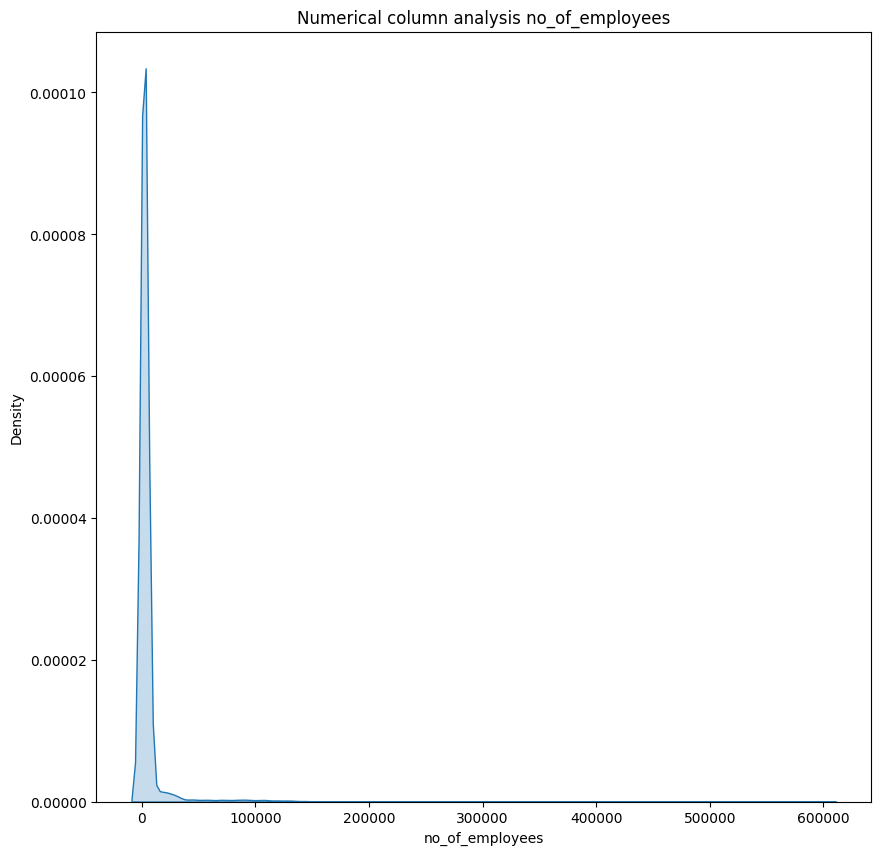

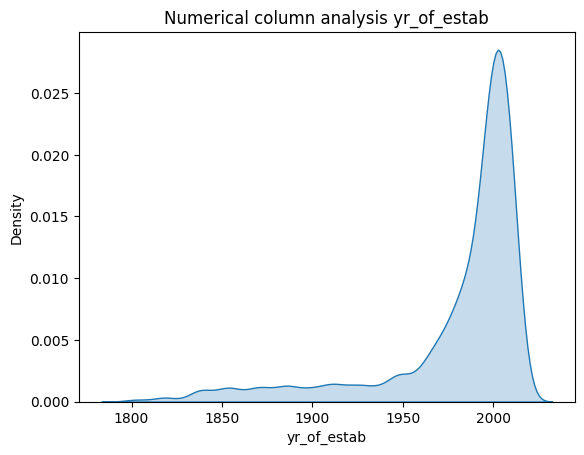

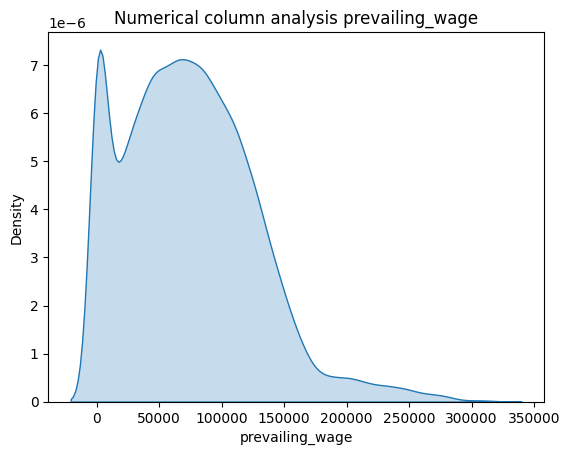

In [14]:
plt.figure(figsize=(10,10))
for feature in num_features:
    sns.kdeplot(data[feature],fill=True)
    plt.title(f'Numerical column analysis {feature}')
    plt.show()

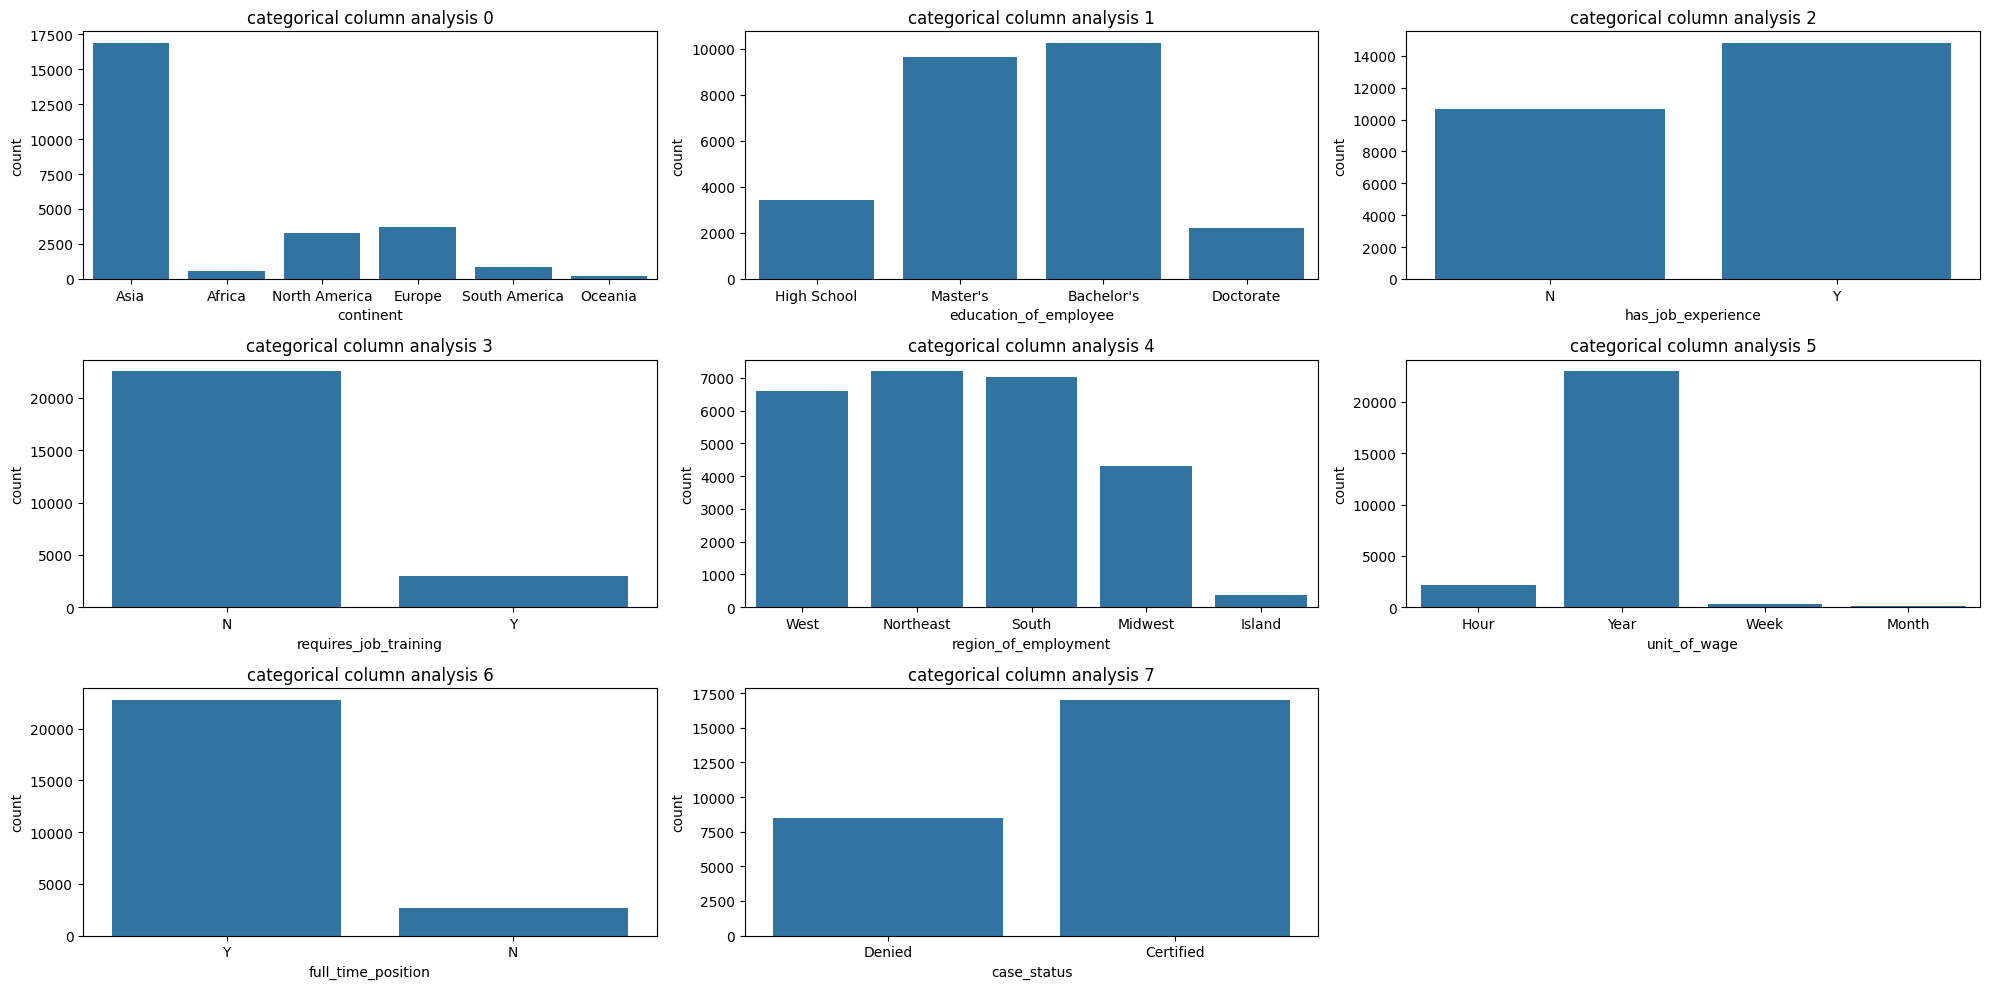

In [15]:
cat_features.remove('case_id')
plt.figure(figsize=(20,10))
for  i in range(0,len(cat_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[cat_features[i]],fill=True)
    plt.title(f'categorical column analysis {i}')
    plt.tight_layout()
plt.show()

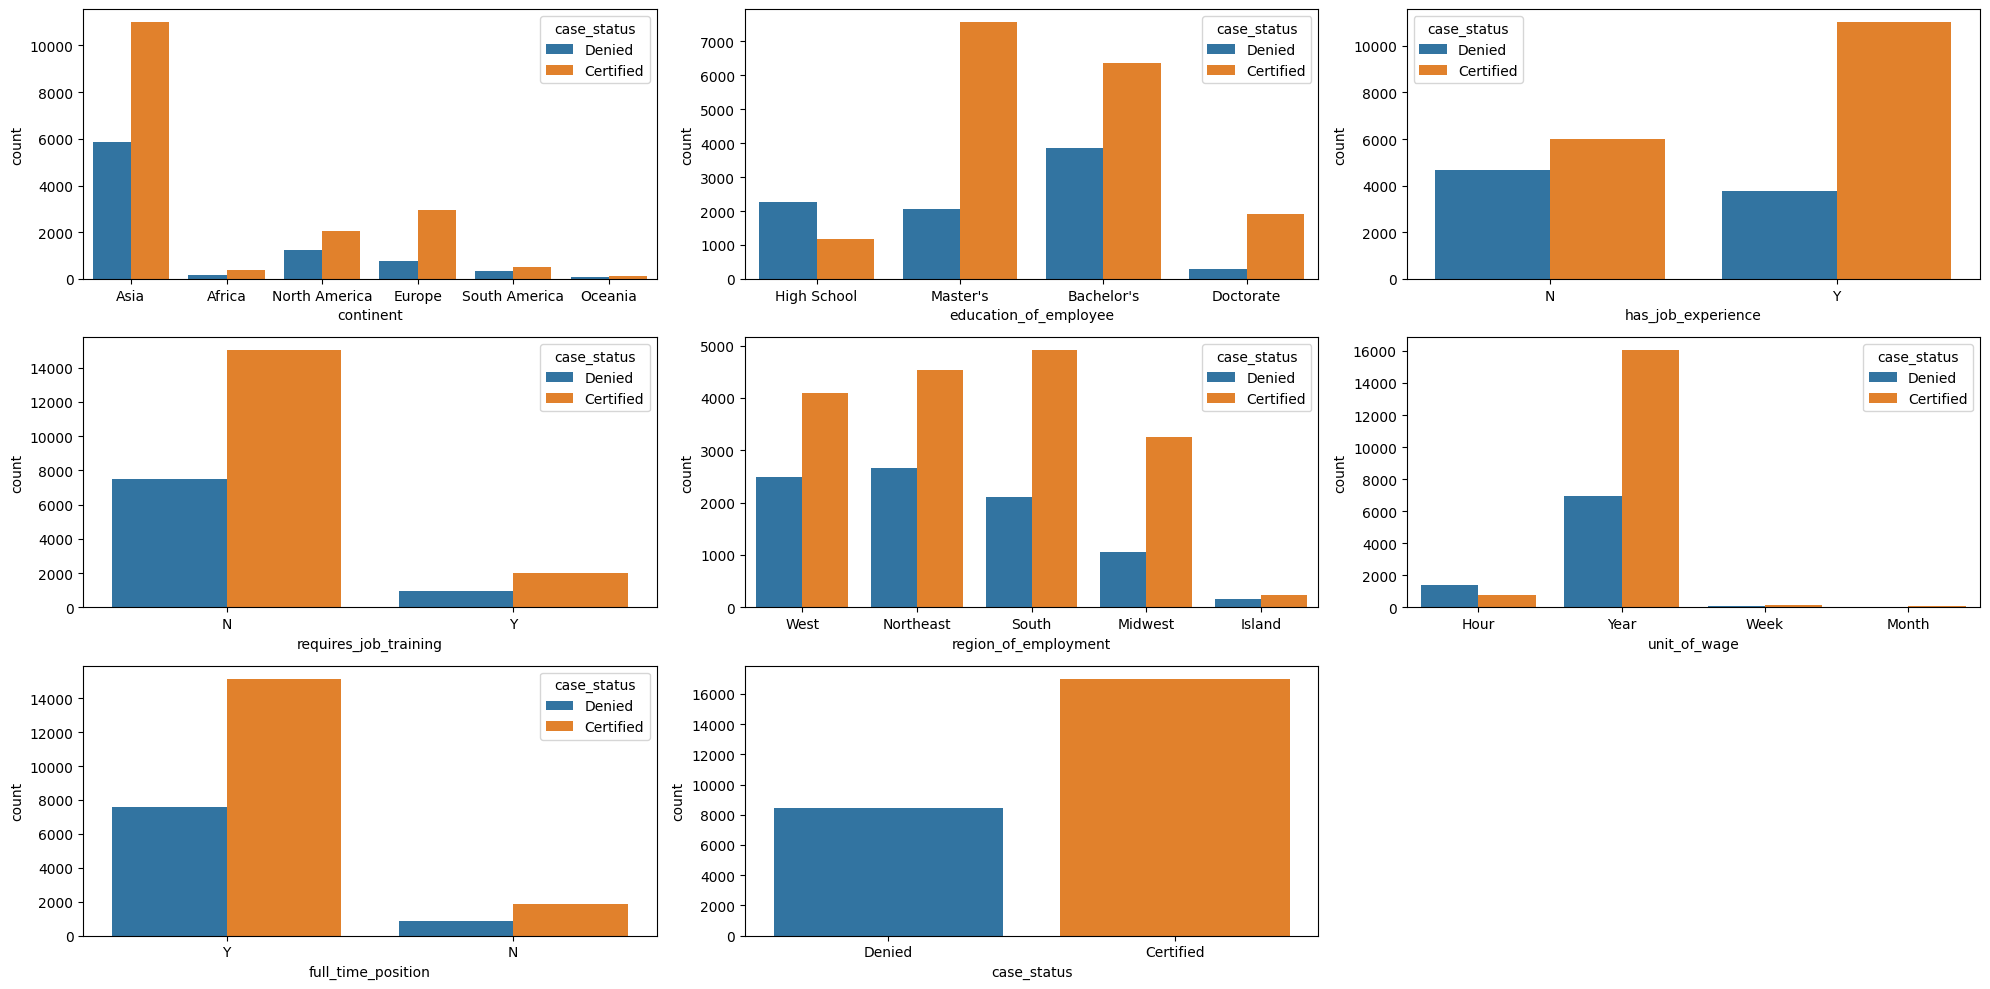

In [16]:
#cat_features.remove('case_id')
plt.figure(figsize=(20,10))
for  i in range(0,len(cat_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[cat_features[i]],fill=True,hue=data['case_status'])
    plt.tight_layout()
plt.show()

<Axes: xlabel='case_status'>

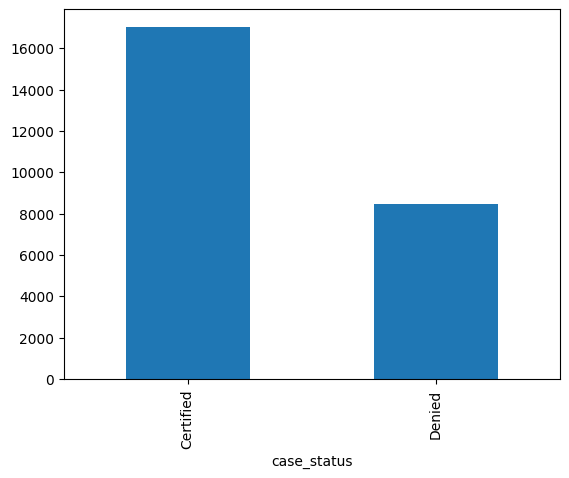

In [17]:
data['case_status'].value_counts().plot(kind='bar')

In [18]:
from scipy.stats import chi2_contingency
chi_test = []  
for col in cat_features:
    table = pd.crosstab(data[col], data['case_status'])  
    _, p, _, _ = chi2_contingency(table)  

    if p < 0.05:
        chi_test.append('Reject Null Hypothesis')  
    else:
        chi_test.append('Fail to Reject Null Hypothesis')  
result = pd.DataFrame({'Column': cat_features, 'Hypothesis Result': chi_test})
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


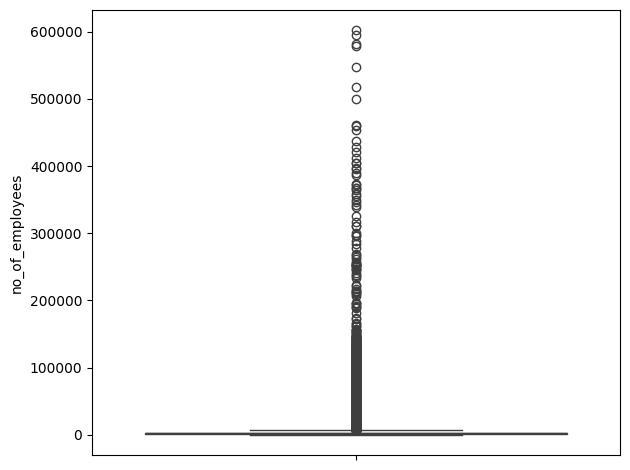

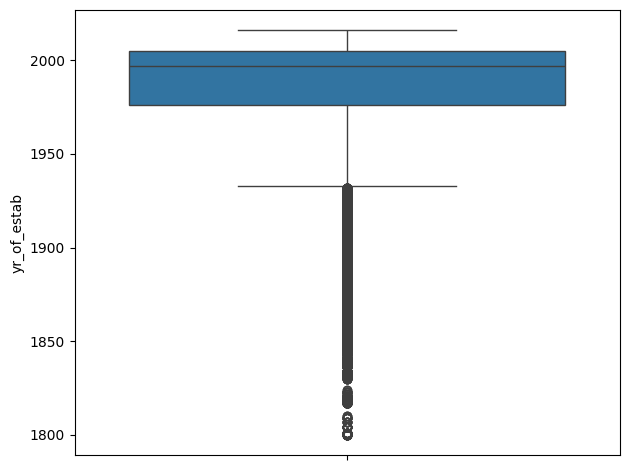

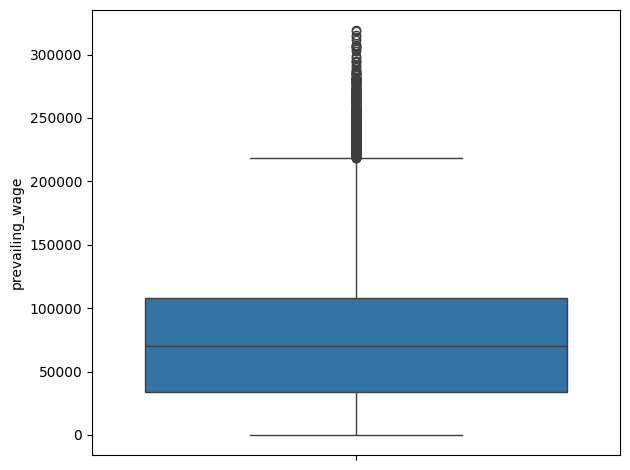

In [19]:
for  i in range(0,len(num_features)):
    sns.boxplot(y=data[num_features[i]],fill=True)
    plt.tight_layout()
    plt.show()

## FE

In [20]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [21]:
data.drop(columns=['case_id','requires_job_training'],axis=1,inplace=True)

In [22]:
def outlier_re(data, col):
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data  

In [23]:
for i in num_features:
    skew_val = data[i].skew()
    print(f"{i} skew value : {skew_val}")

no_of_employees skew value : 12.265260077708275
yr_of_estab skew value : -2.037301271676438
prevailing_wage skew value : 0.7557760603032042


In [24]:
data = outlier_re(data,'no_of_employees')
data = outlier_re(data,'yr_of_estab')

In [25]:
for i in num_features:
    skew_val = data[i].skew()
    print(f"{i} skew value : {skew_val}")

no_of_employees skew value : 0.5856657661512061
yr_of_estab skew value : -1.4046299269620335
prevailing_wage skew value : 0.753753350421684


In [26]:
data.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [27]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'no_of_employees', 'yr_of_estab', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status'],
      dtype='object')

In [28]:
num_features = ['prevailing_wage']

In [29]:

or_columns = ['has_job_experience','full_time_position','education_of_employee']
oh_columns = ['continent','region_of_employment']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        #("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [30]:
data.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [31]:
data.drop(['no_of_employees','yr_of_estab'],axis=1,inplace=True)

In [32]:
X = data.drop('case_status', axis=1)
y = data['case_status']

In [33]:
y= np.where(y=='Denied', 1,0)

In [34]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [36]:
from imblearn.combine import SMOTETomek, SMOTEENN
smt = SMOTEENN(random_state=42,sampling_strategy='auto' )
X_train_re,y_train_re = smt.fit_resample(X_train, y_train)

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [38]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [39]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [40]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [41]:
base_model_report =evaluate_models(X=X_train_re, y=y_train_re, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9861
- F1 score: 0.9861
- Precision: 0.9840
- Recall: 0.9882
- Roc Auc Score: 0.9861


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9749
- F1 score: 0.9749
- Precision: 0.9692
- Recall: 0.9807
- Roc Auc Score: 0.9749


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9098
- F1 score: 0.9075
- Precision: 0.9273
- Recall: 0.8885
- Roc Auc Score: 0.9097
----------------------------------
Model performance for Test set
- Accuracy: 0.9096
- F1 score: 0.9074
- Precision: 0.9262
- Recall: 0.8894
- Roc Auc Score: 0.9095


Logistic Regression
Model performance for Training 

In [42]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.986089
1,Decision Tree,0.974853
5,XGBClassifier,0.965222
4,K-Neighbors Classifier,0.947566
2,Gradient Boosting,0.909577
7,AdaBoost Classifier,0.895131
6,Support Vector Classifier,0.892456
3,Logistic Regression,0.756554


In [43]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [44]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_train_re, y_train_re)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

d:\anaconda\envs\ml_pro\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\anaconda\envs\ml_pro\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


d:\anaconda\envs\ml_pro\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [52]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_train_re, y=y_train_re, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9866
- F1 score: 0.9866
- Precision: 0.9840
- Recall: 0.9893
- Roc Auc Score: 0.9866


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9866
- F1 score: 0.9866
- Precision: 0.9861
- Recall: 0.9871
- Roc Auc Score: 0.9866


XGBClassifier
Model performance for Training set
- Accuracy: 0.9981
- F1 score: 0.9981
- Precision: 0.9989
- Recall: 0.9973
- Roc Auc Score: 0.9981
----------------------------------
Model performance for Test set
- Accuracy: 0.9738
- F1 score: 0.9738
- Precision: 0.9712
- Recall: 0.9764
- Roc Auc Score: 0.9738




In [54]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.986624
1,KNeighborsClassifier,0.986624
2,XGBClassifier,0.973783


In [56]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.6653
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2773
           1       0.50      0.50      0.50      1404

    accuracy                           0.67      4177
   macro avg       0.63      0.63      0.63      4177
weighted avg       0.67      0.67      0.67      4177



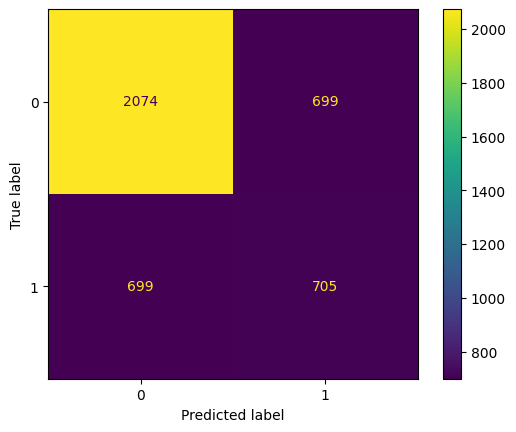

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [46]:
rf = RandomForestClassifier(n_estimators=200, max_features= 'log2', max_depth= None)
rf.fit(X_train,y_train)
prd = rf.predict(X_test)
accuracy_score(y_test,prd)

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 4, algorithm= 'auto')
knn.fit(X_train,y_train)
prd = knn.predict(X_test)
accuracy_score(y_test,prd)

0.6870960019152502

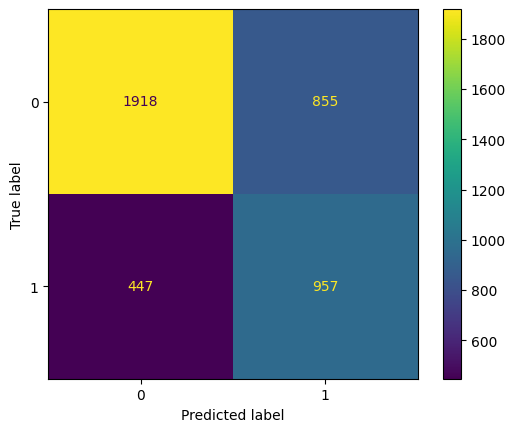

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,Midwest,74362.19,Year,Y,Certified


In [ ]:
data.unit_of_wage.unique()

array(['Year', 'Hour', 'Week', 'Month'], dtype=object)

## test the model 

In [ ]:
column_names = ['continent', 'education_of_employee', 'has_job_experience', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position']
raw_data =[['Asia',"Master's",'N','Northeast','83425.65','Year','N']]
raw_data_df = pd.DataFrame(raw_data, columns=column_names)
raw_data_transformed = preprocessor.transform(raw_data_df)
out_put = rf.predict(raw_data_transformed)
if out_put == 1:
    print('Denied')
else:
    print('Certified')

Certified


In [58]:
data['case_status'].value_counts()

case_status
Certified    13935
Denied        6946
Name: count, dtype: int64

In [62]:
train_data = np.load('train.npy')

In [63]:
train_data

array([[ 0.        ,  0.        ,  1.        , ...,  1.        ,
         3.        , -1.25328908],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         3.        ,  1.06187362],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         3.        , -0.97324844],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.        , -0.13866473],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         3.        , -1.39309885],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         3.        , -0.89617663]])

In [64]:
train_data = pd.DataFrame(train_data)

In [67]:
train_data.shape

(11320, 19)